# **DECISION TREE**

## **Data Preparation:**

In [8]:
import pandas as pd

In [19]:
df = pd.read_csv('heart_disease.csv')

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


# **Exploratory Data Analysis (EDA)**

In [21]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [22]:
#checking missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [23]:
#handling missing value:

In [24]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

In [25]:
cat_cols

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [26]:
num_cols

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num'], dtype='object')

In [27]:
#filling missing values with mean
mean_value = df['oldpeak'].mean()
df['oldpeak'] = df['oldpeak'].fillna(mean_value)

In [28]:
df['oldpeak']

0      2.300000
1      0.000000
2      0.400000
3      0.000000
4      1.500000
         ...   
903    1.500000
904    3.000000
905    2.500000
906    0.891253
907    0.891253
Name: oldpeak, Length: 908, dtype: float64

In [29]:
df[num_cols]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63,145,233,True,150,2.300000,0
1,41,135,203,False,132,0.000000,0
2,57,140,192,False,148,0.400000,0
3,52,118,186,False,190,0.000000,0
4,57,110,201,False,126,1.500000,0
...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4
904,62,166,170,False,120,3.000000,4
905,56,170,0,False,123,2.500000,4
906,56,144,208,True,105,0.891253,4


In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

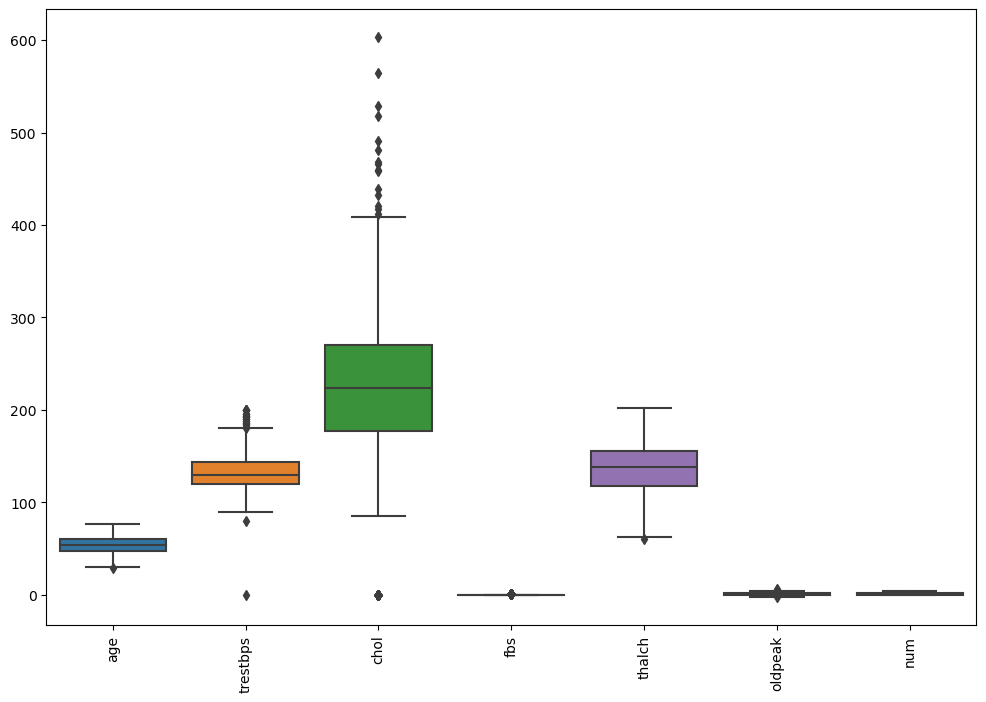

In [31]:
#Visualize the distribution of numerical features
#box plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


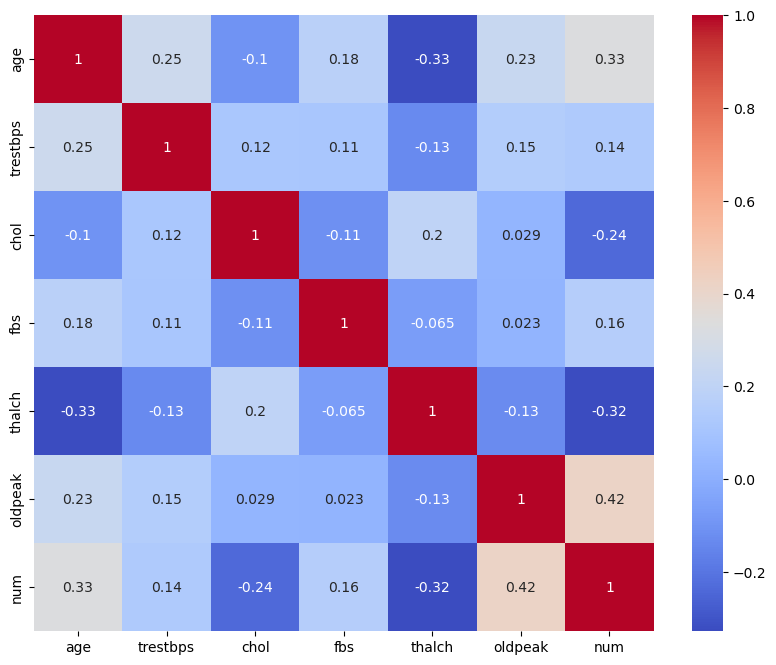

In [32]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

    

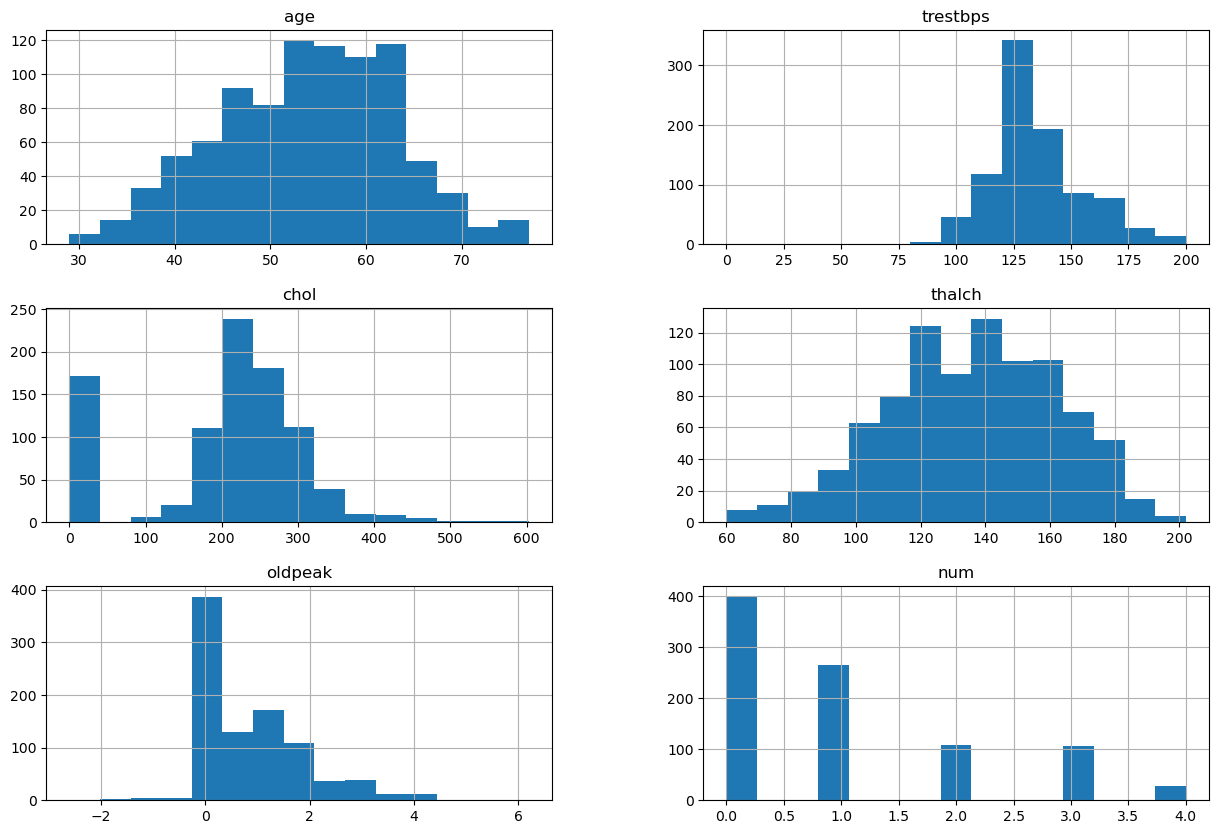

In [33]:
 #Histograms
df.hist(bins=15, figsize=(15, 10))
plt.show()

# **Feature Engineering**

In [34]:
from sklearn.preprocessing import LabelEncoder

# Convert boolean columns to integers
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

# Convert all categorical columns to string type
df[cat_cols] = df[cat_cols].astype(str)

In [35]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode non-boolean categorical variables
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Encoded DataFrame:\n",df.head())

Encoded DataFrame:
    age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      0      2.3      0   
1   41    1   1       135   203    0        1     132      0      0.0      1   
2   57    1   0       140   192    0        1     148      0      0.4      1   
3   52    1   3       118   186    0        0     190      0      0.0      1   
4   57    1   0       110   201    0        1     126      1      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  


In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler


# Scale numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1.976894,0,0.524183,0,1.334996e+00,0,0,-0.881977
1,-1.397560,1,1,0.076967,0.013526,-0.505844,1,-0.147705,0,-8.445938e-01,1,0,-0.881977
2,0.350503,1,0,0.322181,-0.084656,-0.505844,1,0.449529,0,-4.655347e-01,1,0,-0.881977
3,-0.195767,1,3,-0.756760,-0.138211,-0.505844,0,2.017268,0,-8.445938e-01,1,0,-0.881977
4,0.350503,1,0,-1.149102,-0.004325,-0.505844,1,-0.371668,1,5.768777e-01,1,0,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.413461,-1.798388,-0.505844,1,-0.595631,0,5.768777e-01,2,2,2.615119
904,0.896773,1,0,1.597292,-0.281021,-0.505844,2,-0.595631,1,1.998349e+00,1,0,2.615119
905,0.241249,1,2,1.793463,-1.798388,-0.505844,0,-0.483649,1,1.524525e+00,0,2,2.615119
906,0.241249,1,2,0.518352,0.058155,1.976894,2,-1.155538,2,2.104200e-16,0,1,2.615119


# **Decision Tree Classification:**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score

In [39]:
# Convert 'num' to discrete classes because we can apply decision tree classifier to continious target values ((or)) we can apply directly decision tree regressor.
df['num'] = pd.cut(df['num'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

In [40]:
X = df.drop(columns='num')  # Features
y = df['num']  # Target variable

In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
#Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7362637362637363
Precision: 0.46511627906976744
Recall: 0.4444444444444444
F1 Score: 0.45454545454545453
ROC AUC: 0.6382806163828061


# **HyperParameter Tuning**

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.7589985829003306


In [45]:
#Re-evaluate the model using the best parameters found.
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

Tuned Model Accuracy: 0.7362637362637363


# **Model Evaluation and Analysis:**

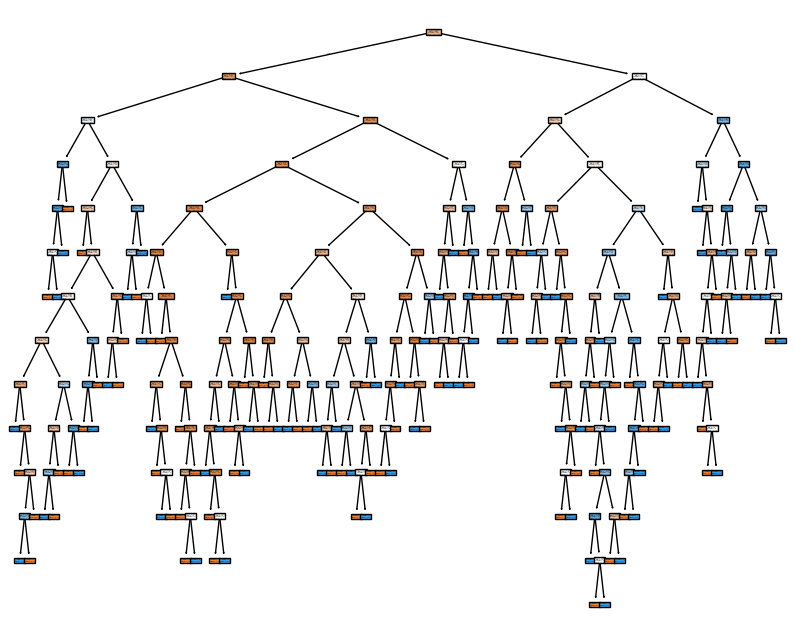

In [46]:
from sklearn.tree import plot_tree

# Visualize the decision tree structure
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True)
plot_params = {'fontsize': 8}
plt.show()

# **INTERVIEW QUESTIONS**

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

The decision tree hyperparameters are:

1.Max Depth: Limits tree depth. Lower values reduce overfitting; higher values capture more patterns.

2.Min Samples Split: Minimum samples needed to split a node. Higher values reduce overfitting.

3.Min Samples Leaf: Minimum samples per leaf. Higher values simplify the model and prevent overfitting.

4.Max Features: Limits features considered per split. Smaller values improve generalization; larger values increase accuracy but may overfit.

5.Max Leaf Nodes: Caps leaf nodes. Lower values reduce complexity; higher values increase accuracy.

6.Criterion: Split quality metric (e.g., "gini," "entropy"). Affects tree structure and balance.

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding: Converts categories to integers (e.g., Red = 0, Blue = 1). Best for ordinal data, but may imply order where none exists.

One-Hot Encoding: Creates binary columns for each category (e.g., Red = [1, 0, 0]). Ideal for nominal data with no order but increases dimensionality.